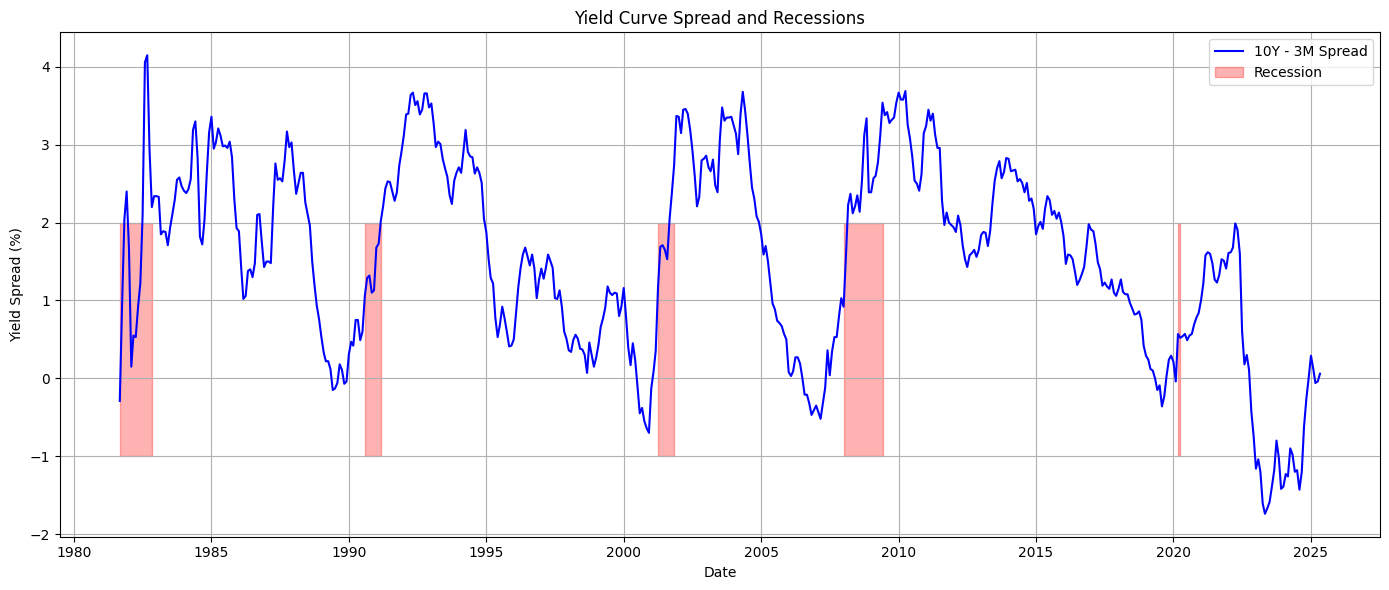

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
PATH = "/Users/rohanjain/Desktop/UMD - MSML/Summer 25/Recession_BondsYield/data/"
gs3m = pd.read_csv(PATH + "GS3M.csv")
gs10 = pd.read_csv(PATH + "GS10.csv")
usrec = pd.read_csv(PATH + "USREC.csv")

# Parse dates
gs3m['DATE'] = pd.to_datetime(gs3m['observation_date'])
gs10['DATE'] = pd.to_datetime(gs10['observation_date'])
usrec['DATE'] = pd.to_datetime(usrec['observation_date'])

# Rename columns for clarity
gs3m = gs3m.rename(columns={'GS3M': 'Yield_3M'})
gs10 = gs10.rename(columns={'GS10': 'Yield_10Y'})

# Merge datasets
df = gs3m.merge(gs10, on='DATE').merge(usrec, on='DATE')
df['Spread'] = df['Yield_10Y'] - df['Yield_3M']
df['USREC'] = df['USREC'].fillna(0)

# Save processed version
df.to_csv(PATH + "yield_merged.csv", index=False)

# Plot the yield spread and recession periods
plt.figure(figsize=(14, 6))
plt.plot(df['DATE'], df['Spread'], label='10Y - 3M Spread', color='blue')
plt.fill_between(df['DATE'], -1, 2, where=(df['USREC'] == 1), color='red', alpha=0.3, label='Recession')
plt.title("Yield Curve Spread and Recessions")
plt.xlabel("Date")
plt.ylabel("Yield Spread (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()